In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [318]:
%%time
df = pd.read_csv('../feature_log.csv').iloc[100000:, :]
df

CPU times: user 335 ms, sys: 46.4 ms, total: 382 ms
Wall time: 412 ms


,BidPrice0,BidPrice1,BidVolume0,AskVolume0,BidVolume1,AskVolume1,AskPrice0,AskPrice1,Convert0,Convert1,...,MeanBidVolume1,MeanAskVolume1,MeanBidPrice0,MeanAskPrice0,MeanBidPrice1,MeanAskPrice1,MeanConvert0,MeanConvert1,LimitPriceBid0,LimitPriceBid1
100000,39498.7,39509.0,1.450,5.156,8.071,0.702,39498.8,39509.1,1.000258,0.999737,...,2.617342,1.135511,39494.463419,39494.566660,39510.382574,39510.483246,1.000400,0.999595,39498.7,39509.0
100001,39498.7,39509.0,1.450,5.156,8.071,0.702,39498.8,39509.1,1.000258,0.999737,...,2.617358,1.135510,39494.463431,39494.566673,39510.382570,39510.483242,1.000400,0.999595,39498.7,39509.0
100002,39498.7,39509.0,1.450,5.156,8.071,0.702,39498.8,39509.1,1.000258,0.999737,...,2.617375,1.135509,39494.463444,39494.566686,39510.382565,39510.483238,1.000400,0.999595,39498.7,39509.0
100003,39498.7,39509.0,1.450,5.156,8.071,0.702,39498.8,39509.1,1.000258,0.999737,...,2.617391,1.135508,39494.463457,39494.566698,39510.382561,39510.483234,1.000400,0.999595,39498.7,39509.0
100004,39498.7,39509.0,1.450,5.156,8.071,0.702,39498.8,39509.1,1.000258,0.999737,...,2.617407,1.135506,39494.463470,39494.566711,39510.382557,39510.483230,1.000400,0.999595,39498.7,39509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239651,39504.3,39522.3,3.567,0.014,0.669,7.258,39504.4,39522.4,1.000453,0.999542,...,3.081345,1.615154,39495.491198,39495.595935,39510.281339,39510.385290,1.000372,0.999623,39504.3,39522.3
239652,39504.3,39522.3,3.567,0.014,0.669,7.258,39504.4,39522.4,1.000453,0.999542,...,3.081338,1.615171,39495.491224,39495.595962,39510.281375,39510.385326,1.000372,0.999623,39504.3,39522.3
239653,39504.3,39522.3,3.567,0.014,0.669,7.258,39504.4,39522.4,1.000453,0.999542,...,3.081331,1.615188,39495.491251,39495.595988,39510.281411,39510.385362,1.000372,0.999623,39504.3,39522.3
239654,39504.3,39522.3,3.567,0.014,0.669,7.258,39504.4,39522.4,1.000453,0.999542,...,3.081324,1.615204,39495.491277,39495.596015,39510.281447,39510.385398,1.000372,0.999623,39504.3,39522.3


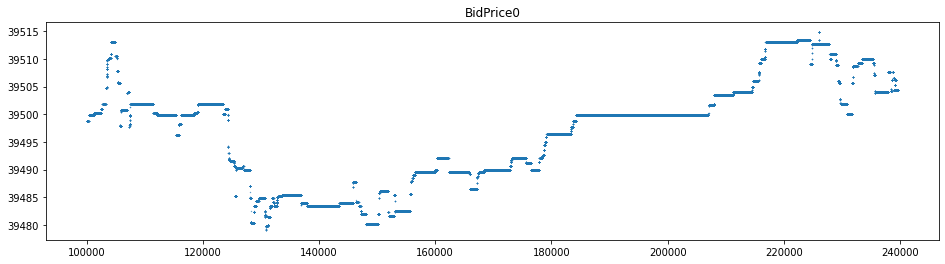

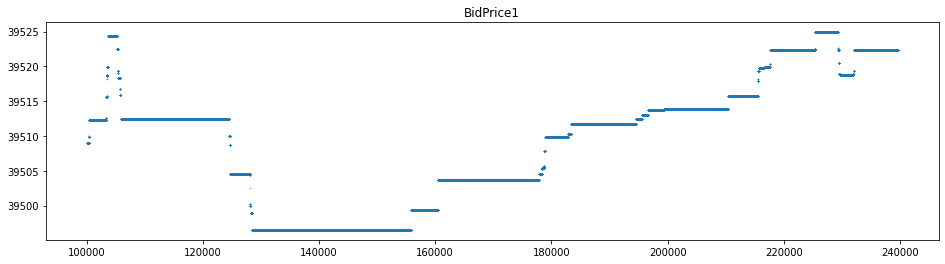

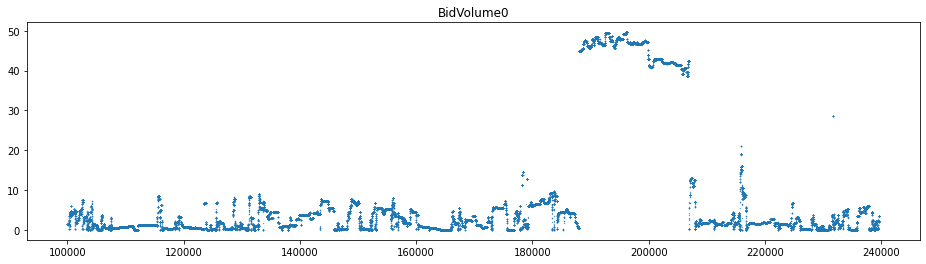

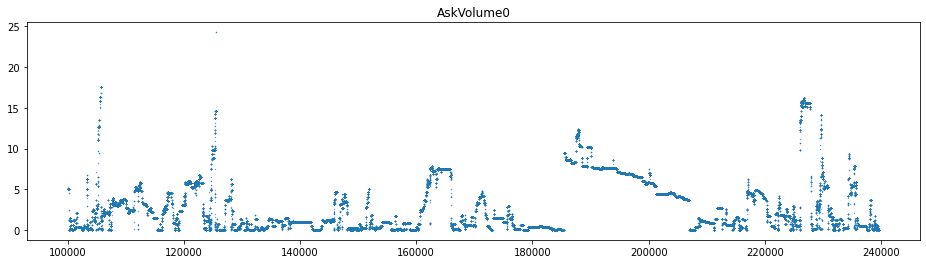

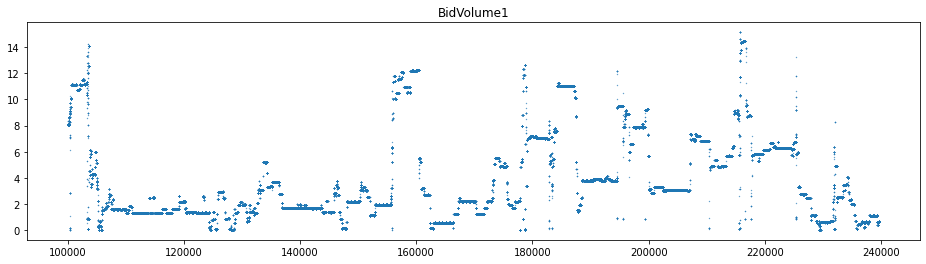

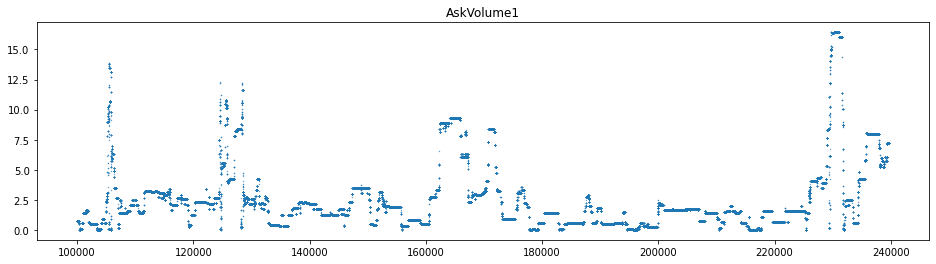

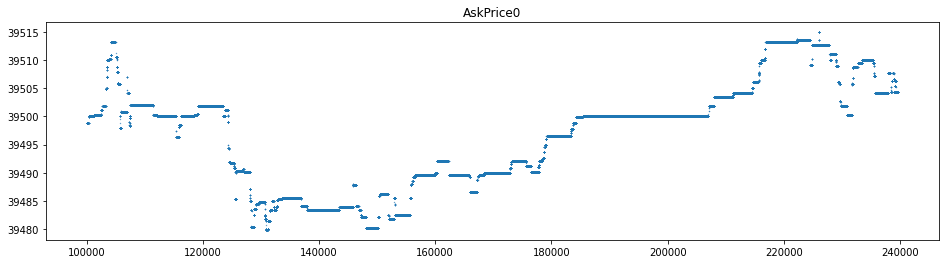

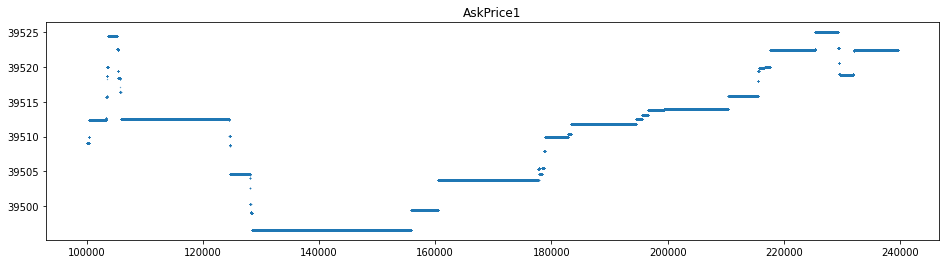

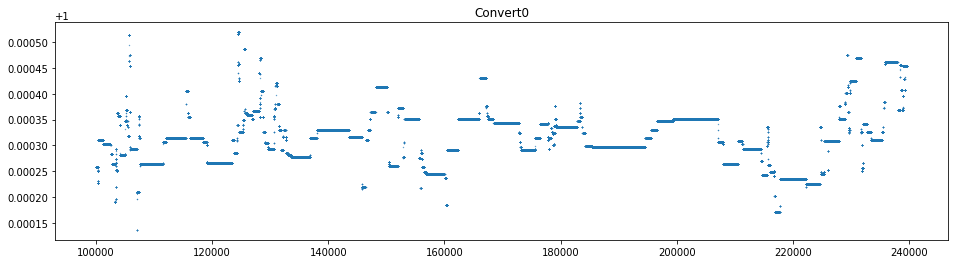

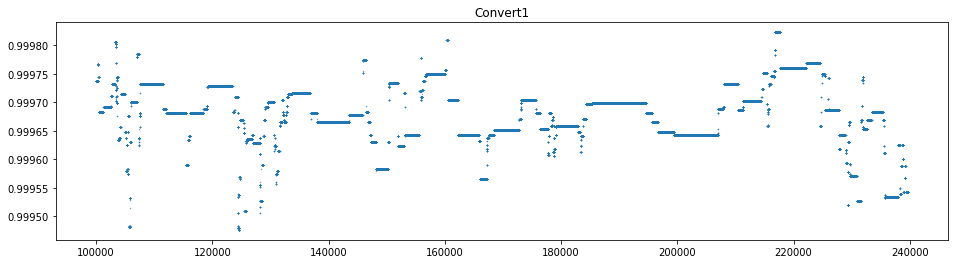

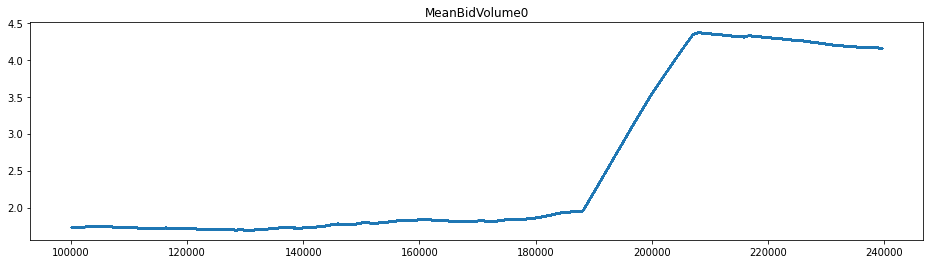

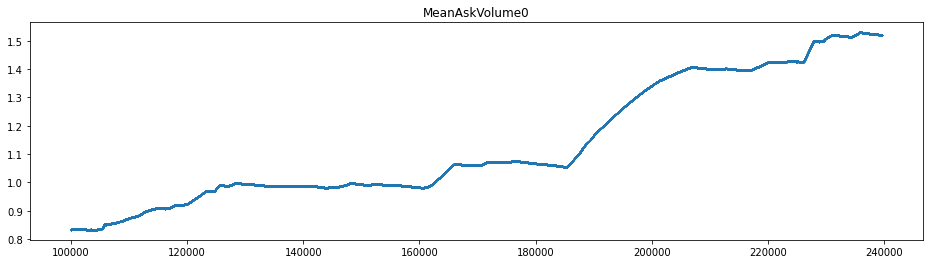

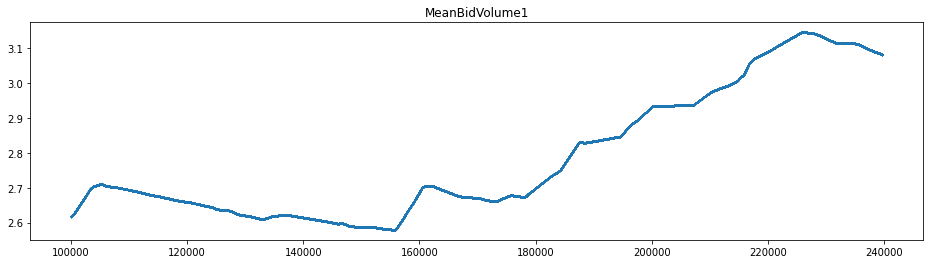

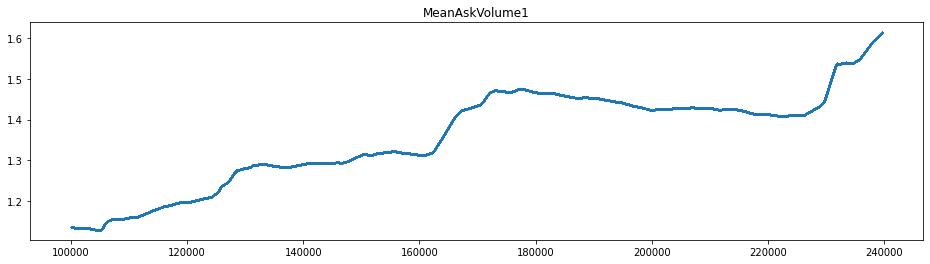

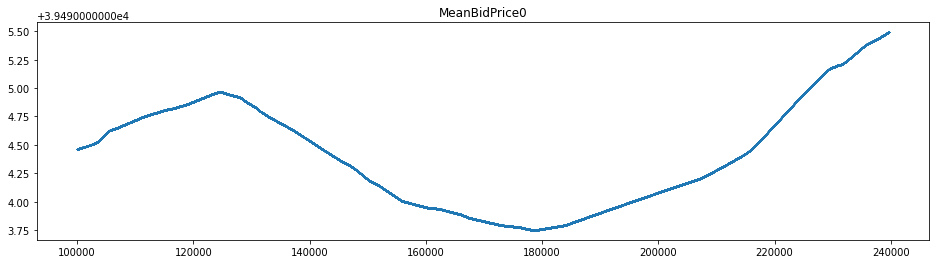

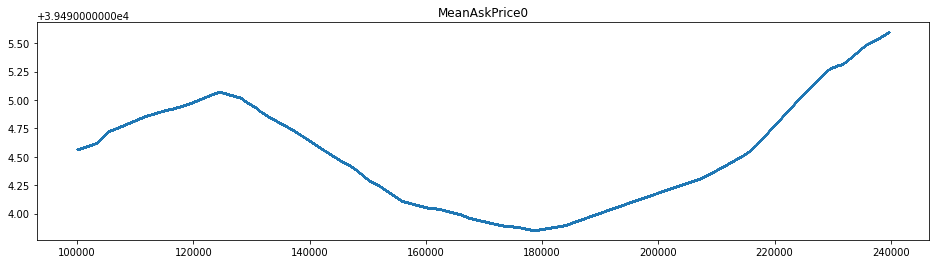

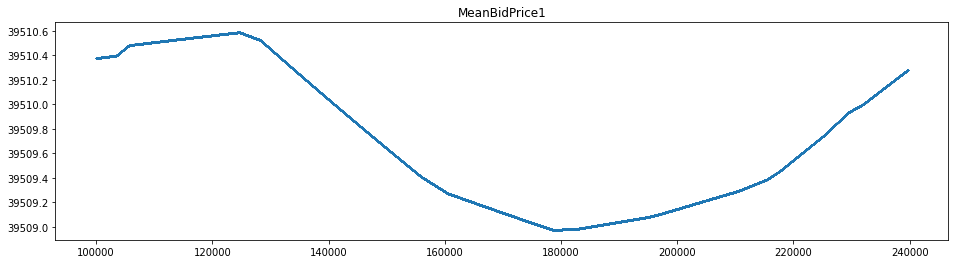

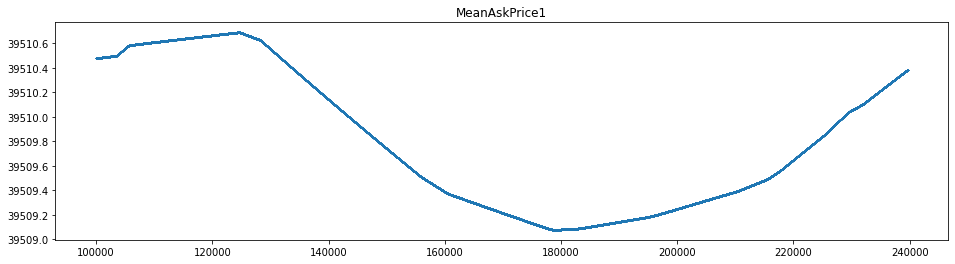

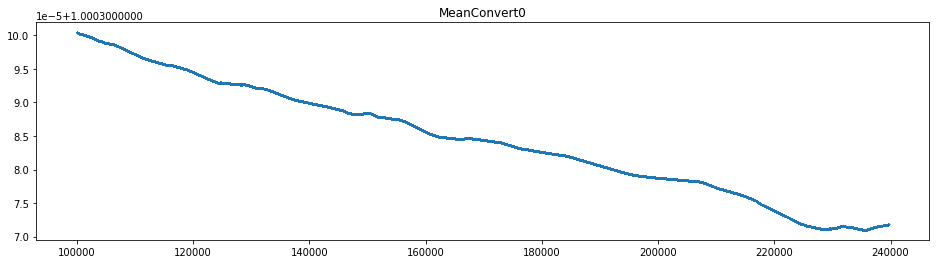

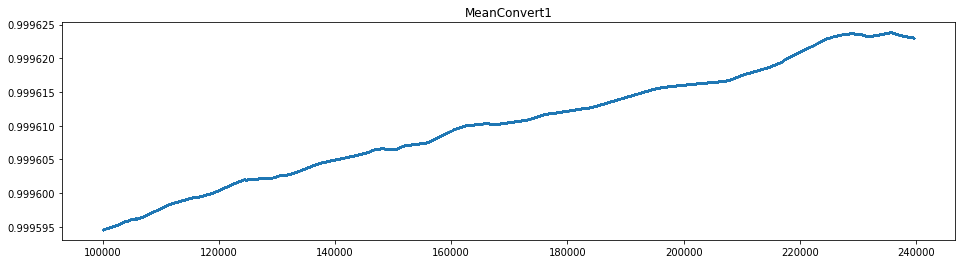

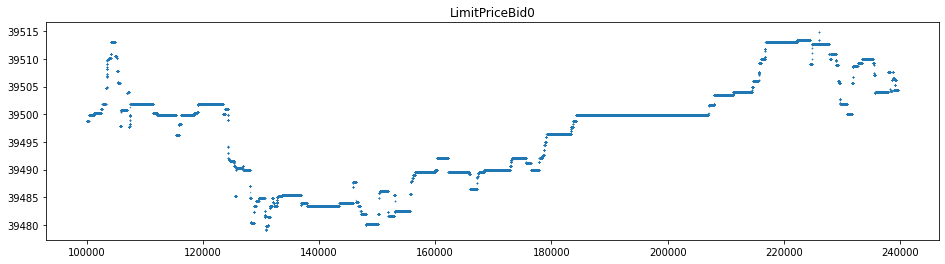

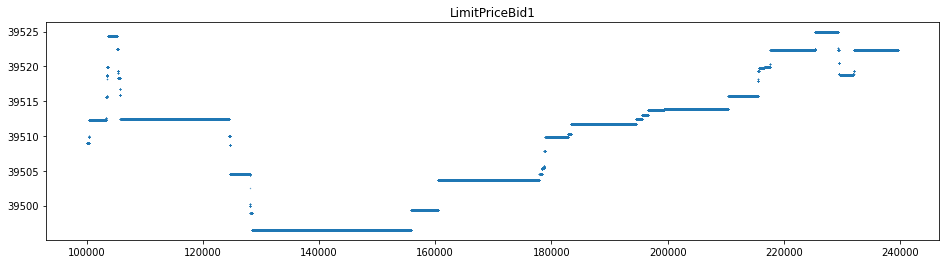

In [319]:
for name in df.columns:
    plt.figure(figsize=(16, 4))
    plt.scatter(df.index, df.loc[:, name], s=0.1)
    plt.title(name)
    plt.show()

In [320]:
model = Ridge()

In [321]:
X = df.iloc[:, :-2]
y = df.BidPrice0 - df.LimitPriceBid0

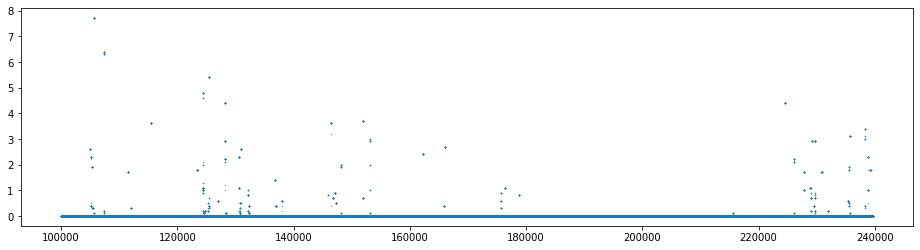

In [322]:
plt.figure(figsize=(16, 4))
plt.scatter(y.index, y, s=0.1)
plt.show()

In [323]:
df.iloc[20:, :][(np.array(df.BidPrice0.rolling(20).min().iloc[20:]) != np.array(df.LimitPriceBid0.iloc[:-20]))]

,BidPrice0,BidPrice1,BidVolume0,AskVolume0,BidVolume1,AskVolume1,AskPrice0,AskPrice1,Convert0,Convert1,...,MeanBidVolume1,MeanAskVolume1,MeanBidPrice0,MeanAskPrice0,MeanBidPrice1,MeanAskPrice1,MeanConvert0,MeanConvert1,LimitPriceBid0,LimitPriceBid1
100369,39499.9,39509.0,0.906,0.152,8.863,0.545,39500.0,39509.1,1.000228,0.999767,...,2.623587,1.135005,39494.468174,39494.571412,39510.381044,39510.481716,1.000400,0.999595,39499.9,39509.0
100383,39499.9,39509.0,3.647,0.152,9.765,0.545,39500.0,39509.1,1.000228,0.999767,...,2.623866,1.134981,39494.468402,39494.571640,39510.380986,39510.481658,1.000400,0.999595,39499.9,39509.0
101278,39500.2,39512.3,2.111,0.352,11.133,1.436,39500.3,39512.4,1.000304,0.999691,...,2.644597,1.133573,39494.482984,39494.586213,39510.385711,39510.486449,1.000400,0.999595,39500.2,39512.3
102551,39501.0,39512.3,3.918,0.001,11.532,0.506,39501.1,39512.4,1.000284,0.999711,...,2.676369,1.133365,39494.504807,39494.608029,39510.393008,39510.493743,1.000400,0.999595,39501.0,39512.3
102559,39501.0,39512.3,5.721,0.252,11.532,0.506,39501.1,39512.4,1.000284,0.999711,...,2.676582,1.133350,39494.504963,39494.608185,39510.393053,39510.493789,1.000400,0.999595,39501.0,39512.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238906,39506.1,39522.3,0.001,1.753,1.057,5.508,39506.7,39522.4,1.000395,0.999588,...,3.086377,1.604309,39495.470667,39495.575357,39510.254447,39510.358407,1.000372,0.999623,39504.3,39522.3
238907,39504.3,39522.3,0.414,0.217,1.057,5.508,39504.4,39522.4,1.000453,0.999542,...,3.086371,1.604321,39495.470694,39495.575384,39510.254483,39510.358443,1.000372,0.999623,39504.3,39522.3
239108,39505.3,39522.3,2.126,0.001,1.082,5.762,39505.4,39522.4,1.000428,0.999567,...,3.085158,1.606982,39495.476076,39495.580787,39510.261744,39510.365702,1.000372,0.999623,39505.3,39522.3
239169,39506.1,39522.3,2.185,0.598,1.082,5.762,39506.2,39522.4,1.000408,0.999588,...,3.084792,1.607742,39495.477922,39495.582613,39510.263947,39510.367904,1.000372,0.999623,39506.1,39522.3


In [324]:
df.loc[101303 - 30:101303 + 20, ['BidPrice0', 'LimitPriceBid0']]

,BidPrice0,LimitPriceBid0
101273,39500.2,39500.2
101274,39500.2,39500.2
101275,39500.2,39500.2
101276,39500.2,39500.2
101277,39500.2,39500.2
101278,39500.2,39500.2
101279,39500.2,39500.2
101280,39500.2,39500.2
101281,39500.2,39500.2
101282,39500.2,39500.2


In [325]:
model.fit(X, y)
y_pred = model.predict(X)

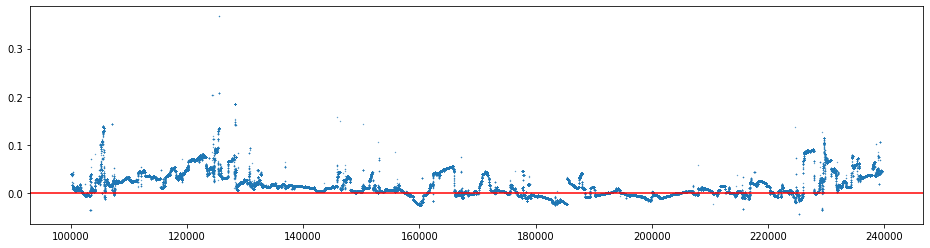

In [326]:
plt.figure(figsize=(16, 4))
plt.scatter(y.index, y_pred, s=0.1)
plt.axhline(0, c='red')
plt.show()

In [327]:
((y - y_pred)**2).mean()

0.051073109789372344

In [328]:
model.coef_

array([-3.29533011e-02, -1.24415781e-02, -4.39125354e-04,  5.56794571e-03,
       -7.67619816e-05,  3.49752724e-03,  3.56818799e-02,  1.17346326e-02,
       -4.54467891e-06,  1.99743491e-06,  2.35401450e-02,  8.77385452e-03,
       -3.37466170e-01,  9.59013054e-02,  2.23707330e-02,  2.71704998e-02,
       -4.00271695e-02,  2.95281479e-02, -1.66011363e-06, -2.18186550e-07])

In [329]:
df.shape

(139656, 22)

BidPrice0:	-8.343269705544176e-07
BidPrice1:	-3.149012297693769e-07
BidVolume0:	-5.258545724486686e-05
AskVolume0:	0.002007001831580006
BidVolume1:	-1.9710572749728757e-05
AskVolume1:	0.0013975491614309909
AskPrice0:	9.034079177452025e-07
AskPrice1:	2.97007329869702e-07
Convert0:	-4.543242560341228e-06
Convert1:	1.998077459416054e-06
MeanBidVolume0:	0.009207414400107522
MeanAskVolume0:	0.007732918980637379
MeanBidVolume1:	-0.12108585739565725
MeanAskVolume1:	0.07063817502634646
MeanBidPrice0:	5.664277844346472e-07
MeanAskPrice0:	6.879562325599286e-07
MeanBidPrice1:	-1.0130971972093291e-06
MeanAskPrice1:	7.473625154191385e-07
MeanConvert0:	-1.659475580171819e-06
MeanConvert1:	-2.1827158596461897e-07


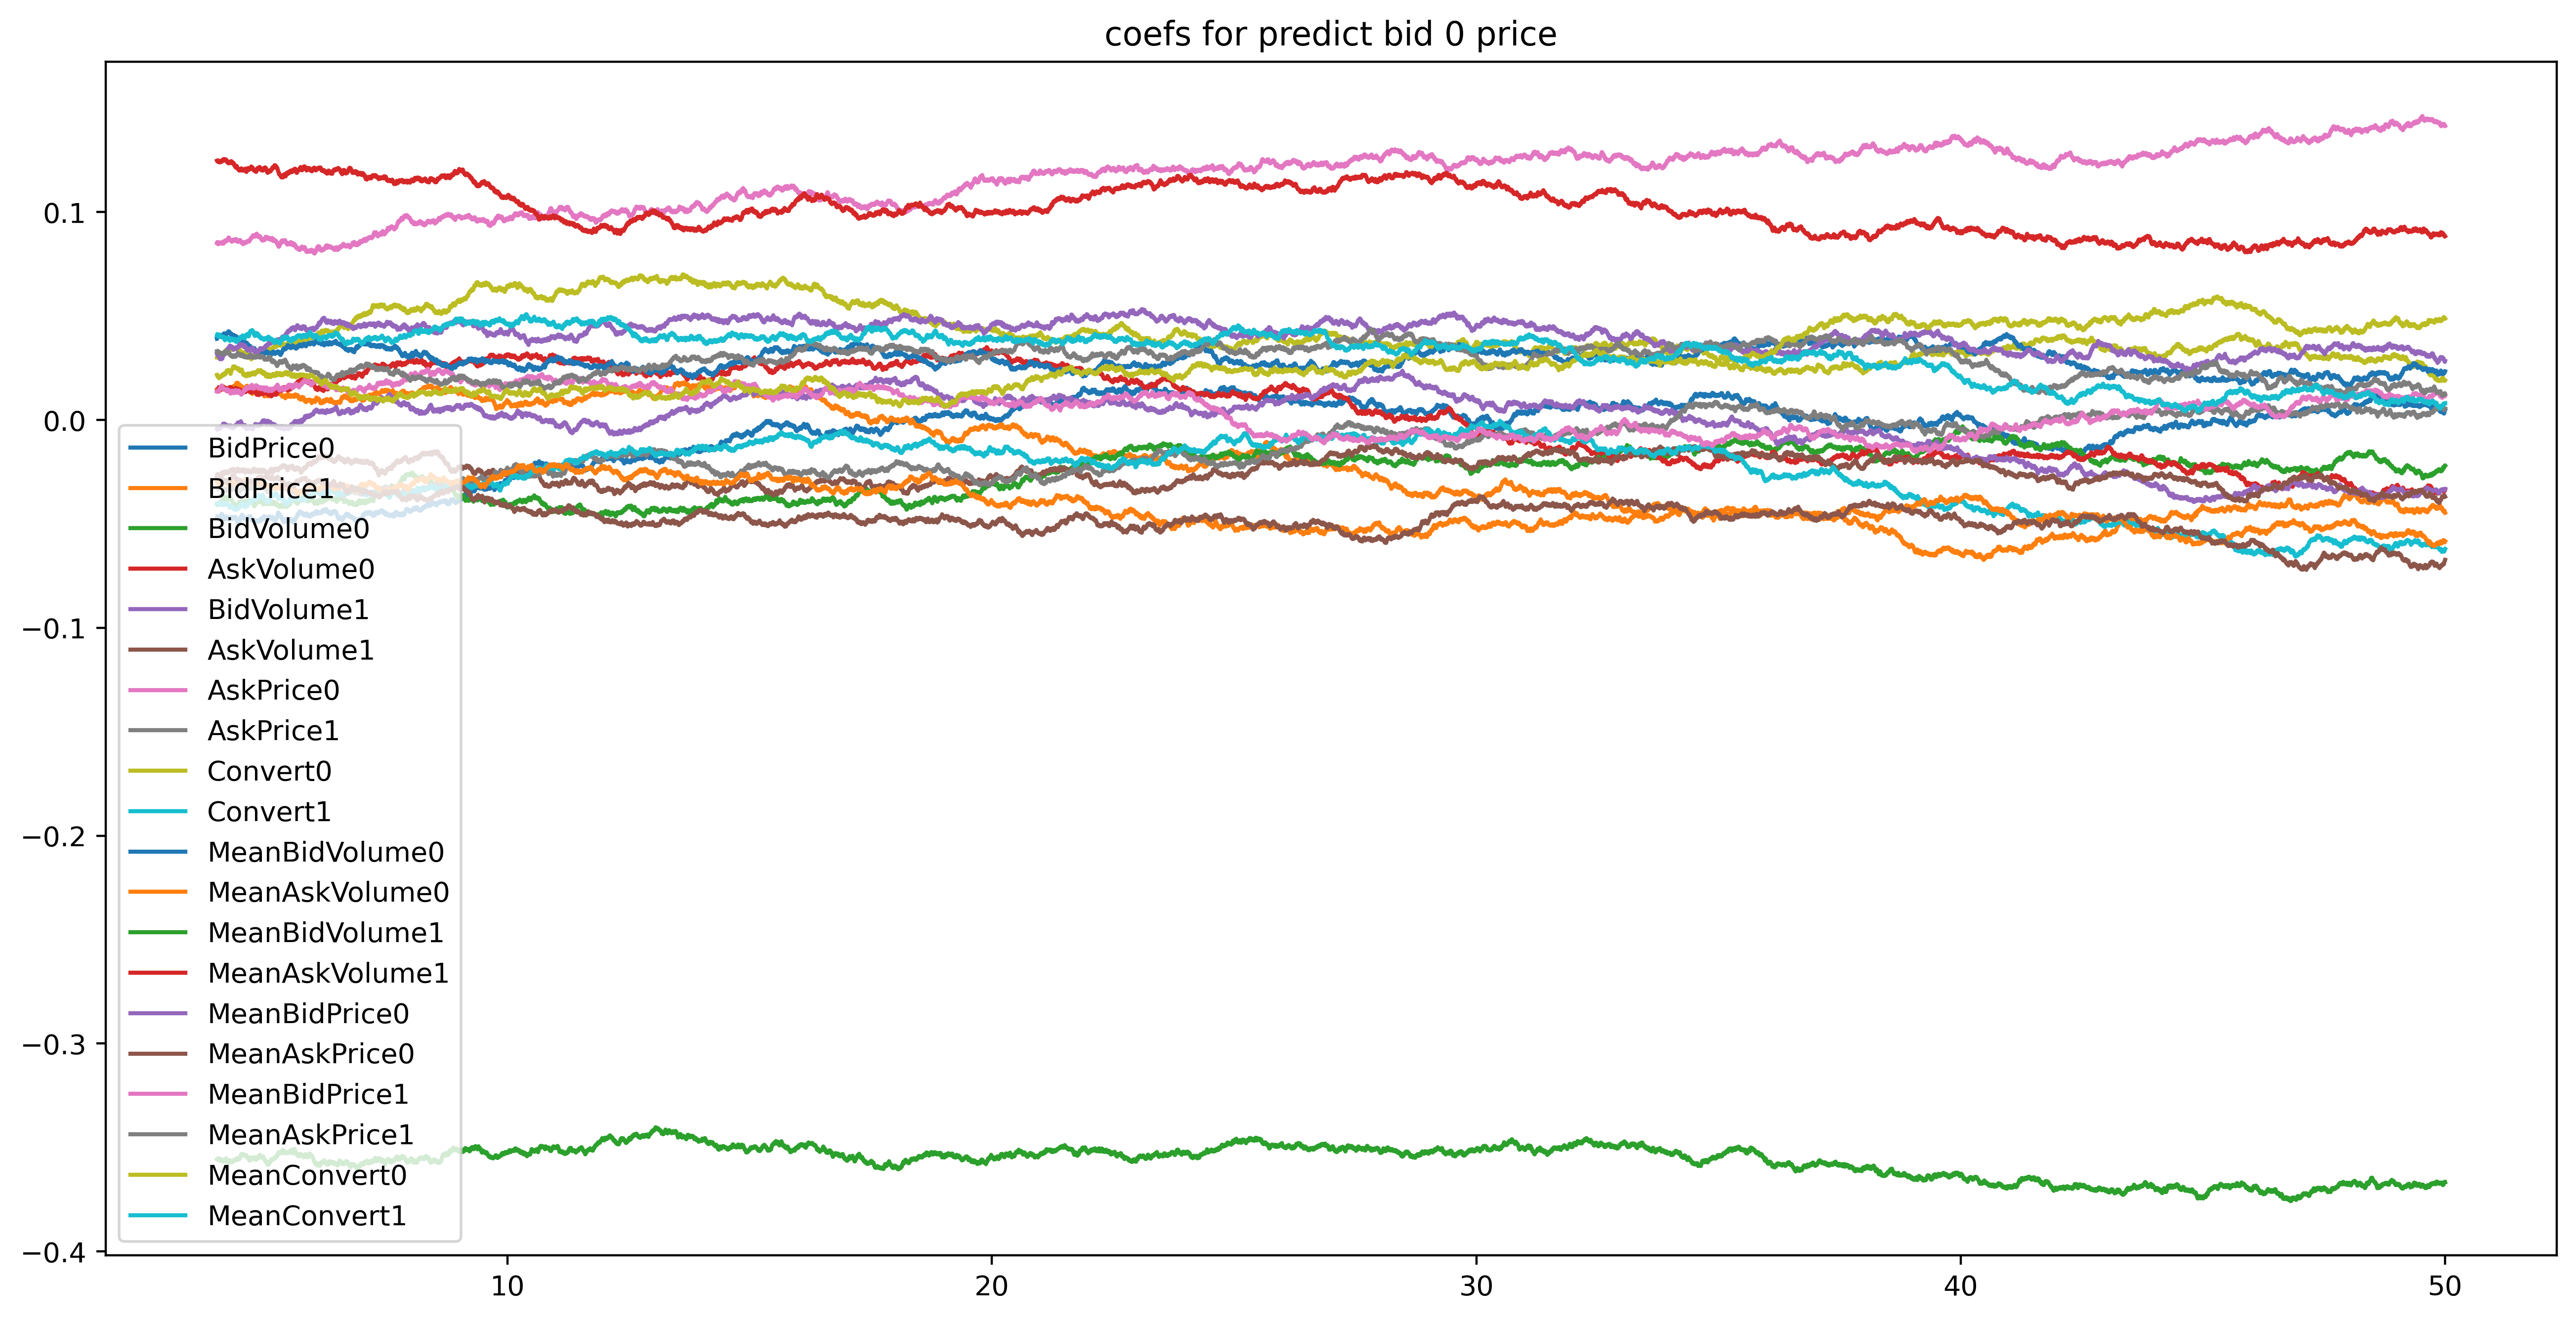

In [354]:
n = 1000 * 10
time = np.linspace(4, 50, n)

plt.figure(figsize=(16, 8), dpi=400)
    
for num, name in enumerate(X.columns):
    print(f'{name}:\t{model.coef_[num] / X.loc[:, name].mean()}')
    
    val = model.coef_[num]
    part = 0.001
    
    plt.plot(time, val * (1 - part) + part * (np.random.rand(n * 2) - 0.5).cumsum()[n:], label=name)
    
plt.legend()
plt.title('coefs for predict bid 0 price')
plt.show()

In [341]:
time = np.linspace(4, 50, n)

In [342]:
time

array([ 4.       ,  4.0000046,  4.0000092, ..., 49.9999908, 49.9999954,
       50.       ])

In [339]:
(np.random.rand(100) - 0.5).cumsum()

array([-0.32780966, -0.01670109, -0.45578596, -0.16384798, -0.04514568,
        0.05505388, -0.01710288, -0.02308092,  0.33488034,  0.3461577 ,
        0.33711679, -0.14053453, -0.16356543, -0.65099368, -0.64711858,
       -0.68983982, -0.66620337, -0.17422359,  0.18744255,  0.27789115,
        0.22680164,  0.34258842,  0.12829943,  0.34963652,  0.60353706,
        0.10572232,  0.42350937,  0.85514419,  0.38254991, -0.06993758,
       -0.28463277,  0.19820322, -0.18386532,  0.00733713, -0.14177599,
       -0.1098291 ,  0.02940361, -0.42400171, -0.64000755, -0.70452185,
       -0.43399708, -0.77846317, -0.88109566, -1.35983573, -1.16980278,
       -0.91512567, -1.07025855, -0.58861161, -1.00391889, -1.22725912,
       -1.71138976, -1.42440791, -1.05482882, -1.28551101, -0.85573202,
       -0.66918321, -0.98507765, -0.7946812 , -0.7252277 , -0.49305826,
       -0.00861406,  0.4906371 ,  0.36664369, -0.04588231, -0.46972014,
       -0.78213447, -0.5919511 , -0.85262019, -1.14296797, -0.93

In [15]:
df_f = df[df.BidPrice1 / df.AskPrice0 * df.MeanConvert1 * (1 - 0.0002) > 1]
df_f

,BidVolume0,AskVolume0,BidVolume1,AskVolume1,BidPrice0,AskPrice0,BidPrice1,AskPrice1,Convert0,Convert1,...,MeanBidVolume1,MeanAskVolume1,MeanBidPrice0,MeanAskPrice0,MeanBidPrice1,MeanAskPrice1,MeanConvert0,MeanConvert1,LimitPriceBid0,LimitPriceBid1
152056,1.621,0.013,0.052,11.555,39452.7,39452.8,39475.7,39475.8,1.000580,0.999415,...,3.032373,1.641682,39500.026943,39500.134349,39514.818659,39514.922239,1.000372,0.999623,39452.7,39475.7
152057,1.621,0.940,0.052,11.555,39452.7,39452.8,39475.7,39475.8,1.000580,0.999415,...,3.032364,1.641712,39500.026801,39500.134207,39514.818542,39514.922122,1.000372,0.999623,39452.7,39475.7
152058,1.621,0.927,0.052,11.555,39452.7,39452.8,39475.7,39475.8,1.000580,0.999415,...,3.032355,1.641742,39500.026659,39500.134065,39514.818424,39514.922004,1.000372,0.999623,39452.7,39475.7
152059,1.621,1.351,0.052,11.595,39452.7,39452.8,39475.7,39475.8,1.000580,0.999415,...,3.032346,1.641772,39500.026517,39500.133923,39514.818307,39514.921887,1.000372,0.999623,39452.7,39475.7
152060,1.697,1.448,0.077,11.595,39452.7,39452.8,39475.7,39475.8,1.000580,0.999415,...,3.032337,1.641802,39500.026375,39500.133781,39514.818190,39514.921770,1.000372,0.999623,39452.7,39475.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168119,6.296,0.005,0.372,8.432,39464.2,39464.3,39487.4,39487.5,1.000585,0.999410,...,2.945911,1.933517,39498.358437,39498.465807,39513.365326,39513.468949,1.000377,0.999618,39464.2,39487.4
168120,6.296,0.005,0.372,8.432,39464.2,39464.3,39487.4,39487.5,1.000585,0.999410,...,2.945903,1.933536,39498.358334,39498.465704,39513.365248,39513.468872,1.000377,0.999618,39464.2,39487.4
168121,6.296,0.005,0.372,8.432,39464.2,39464.3,39487.4,39487.5,1.000585,0.999410,...,2.945896,1.933556,39498.358232,39498.465602,39513.365170,39513.468794,1.000377,0.999618,39464.2,39487.4
168122,6.296,0.005,0.372,8.425,39464.2,39464.3,39487.4,39487.5,1.000585,0.999410,...,2.945888,1.933575,39498.358130,39498.465499,39513.365092,39513.468716,1.000377,0.999618,39464.2,39487.4


100000    1.000147
100001    1.000147
100002    1.000147
100003    1.000147
100004    1.000147
            ...   
239887    1.000207
239888    1.000207
239889    1.000207
239890    1.000207
239891    1.000207
Length: 139892, dtype: float64